# Modélisation mathématique – TP Noté

**FI-3 - 19/11/2025**

# Exercice 1: Utilisation de la librairie `scikit-learn`

1. **Chargement des données:** loadez le dataset `data.csv`.
  
2. **Anaylse de données:** Faites une petite analyse de données de ce dataset.

   - Si vous le désirez (pas obligatoire), vou pouvez encoder les variables discrètes grâce à la fonction `pd.get_dummies(df,...)`.
     <br><br>

4. **Problème de régression:** Prédisez la variable `area` en fonction des autres (toutes ou partie).

   - Puisque la variable `area` est fortement asymétrique, prédizez plutôt la transformation suivante:`log(1 + area)`. Le code pour créer cette variable transformée comme nouvelle colonne d'un dataframe `df` est:
     
     ```python
     df["log_area"] = np.log1p(df["area"])
     ```
     <br>

5. **Problème de classification:** Prédisez maintenant une variable appelée `severity`, obtenue en discrétisant de variable `area` en 3 classes: `faible`, `moyen` et `fort`.

    - La variable `severity` s'obtient grâce au code suivant:<br><br>
   
   ```python
    def severity(area):
        if area == 0:
            return "faible"
        elif area <= 1:
            return "moyen"
        else:
            return "fort"
    ```


   <br>
   puis, pour en faire une colonne de votre dataframe `df`
   
   ```python

   df["severity"] = df["area"].apply(severity)
   ```
   
   <br>
   
   ***Remarque:** Ne vous inquiétez pas si les résultats ne sont pas très bons...*

## Librairies

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns              # à commenter si marche pas...
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    mean_squared_error, r2_score,  # scores pour régression
    classification_report          # score pour classification
)

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
# Vous pouvez importer d'autres modèles, sentez-vous libre !!!
# Toute autre import de sklearn ou autres est autorisé...

In [2]:
# Insérez autant de cellules que vous voulez...

# Exercice 2: Algorithme de classification binaire

> - Implémenter **l'algorithme de classification binaire** qui est décrit ci-dessous sous forme de **pseudo-code**.
> - Utlisez une implémentation sous forme de **classe**.
> - L'algorthme devra contenir les **méthodes** `fit` et `predict` pour entraîner le modèle et prédire de nouvelles data, respectivement.
> - Appliquez votre algorithme sur le **dataset** `X, y` ci-dessous.

```text
Algo (pseudo-code)
------------------

# Entrées :
    - X ∈ ℝ^{n×d}                             # features: n lignes, d colonnes
    - y ∈ {−1, +1}^n                          # labels: n valeurs +1 ou -1
    - eta : taux d’apprentissage              # ex. eta=0.1
    - max_iter : nombre maximal d’itérations  # ex. max_iter=50

# Initialisation :
    - w ← 0_d        (vecteur de poids initialisés à 0, dim. d)
    - b ← 0          (biais initialisé à 0)

# Boucle d'entraînement
    For t = 1 → max_iter :
        For i = 1 → n :
            y_pred ← signe( w · X[i] + b )   # produit scalair
            If y_pred ≠ y[i] :
                w ← w + eta * y[i] * X[i]
                b ← b + eta * y[i]
    Return w, b

# Prédiction pour y_hat la data x :
    si w · x + b ≥ 0 → y_hat = +1
    sinon → y_hat = −1
```

## Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

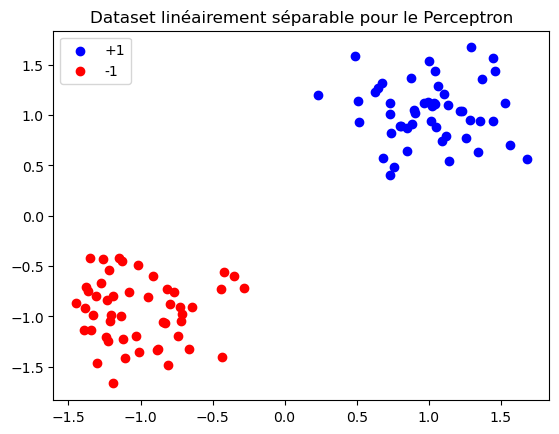

In [2]:
np.random.seed(0)

# Classe +1
X_pos = np.random.randn(50, 2) * 0.3 + np.array([1, 1])
y_pos = np.ones(50)

# Classe -1
X_neg = np.random.randn(50, 2) * 0.3 + np.array([-1, -1])
y_neg = -np.ones(50)

X = np.vstack([X_pos, X_neg])
y = np.hstack([y_pos, y_neg])

# Visualisation du dataset
plt.scatter(X_pos[:,0], X_pos[:,1], color="blue", label="+1")
plt.scatter(X_neg[:,0], X_neg[:,1], color="red", label="-1")
plt.legend()
plt.title("Dataset linéairement séparable pour le Perceptron")
plt.show()

In [ ]:
# Insérez autant de cellules que vous voulez...